In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

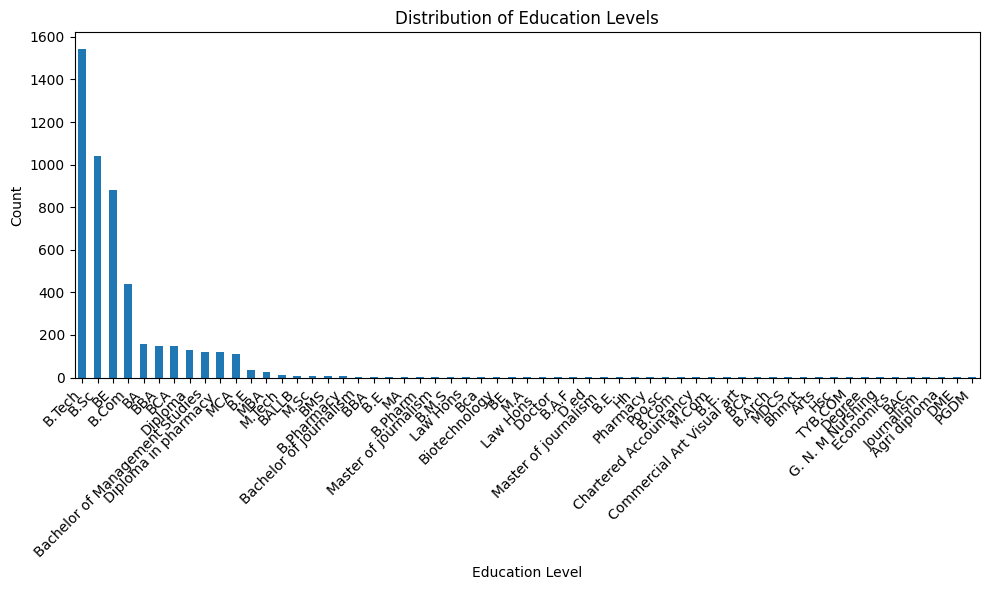

In [75]:
df = pd.read_csv(r"C:\Users\abmir\OneDrive\School\McGill\Bagel\resume_extraction\resume_extraction.csv",nrows=5000)
#create a histogram plot of the education column
plt.figure(figsize=(10, 6))
df['Education'].value_counts().plot(kind='bar')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [76]:
# remove rows with all missing values
df = df[df.notna().all(axis=1)]
len(df)

1425

In [77]:
#reduce the number of rows to 1000
df = df.sample(n=1000)
len(df)
#strip column names of whitespace
df.columns = df.columns.str.strip()

#reset the index 
df = df.reset_index(drop=True)

#create a new column with 'A' prefix followed by the row number
df['A_ID'] = 'A' + (df.index + 1).astype(str)

#put A_ID as the first column
df = df[['A_ID'] + [col for col in df.columns if col != 'A_ID']]    

df.head(5)




,A_ID,Gender,Education,Specialization,interests,skills,Yearly salary in pounds,Certifications,Job_status,Job_title,Highest Qualification
0,A1,Male,B.Sc,Physics,News Coverage;Social Justice;Content Writing;G...,Accounting Skills;Critical Thinking;Gathering ...,57,No,Yes,Sub Editor,Master of journalism
1,A2,Male,Bachelor of Management Studies,Business Administration,"Sales/Marketing, Entrepreneurship","Business Knowledge, People Management, Communi...",61,No,Yes,Business Consultant,Master in Commerce
2,A3,Female,B.Sc,Computer Science Engineering,"Take risk for Profits, Teaching, Technology","Accounting Skills, Business Knowledge, Program...",77,C programming,No,Office assistant and acoounts,Masters in Computer Science
3,A4,Male,Bachelor of Management Studies,Business Administration,"Sales/Marketing, Entrepreneurship","Business Knowledge, People Management, Communi...",50,No,Yes,Business Consultant,Master in Commerce
4,A5,Male,B.Sc,Physics,News Coverage;Social Justice;Content Writing;G...,Accounting Skills;Critical Thinking;Gathering ...,79,No,Yes,Sub Editor,Master of journalism


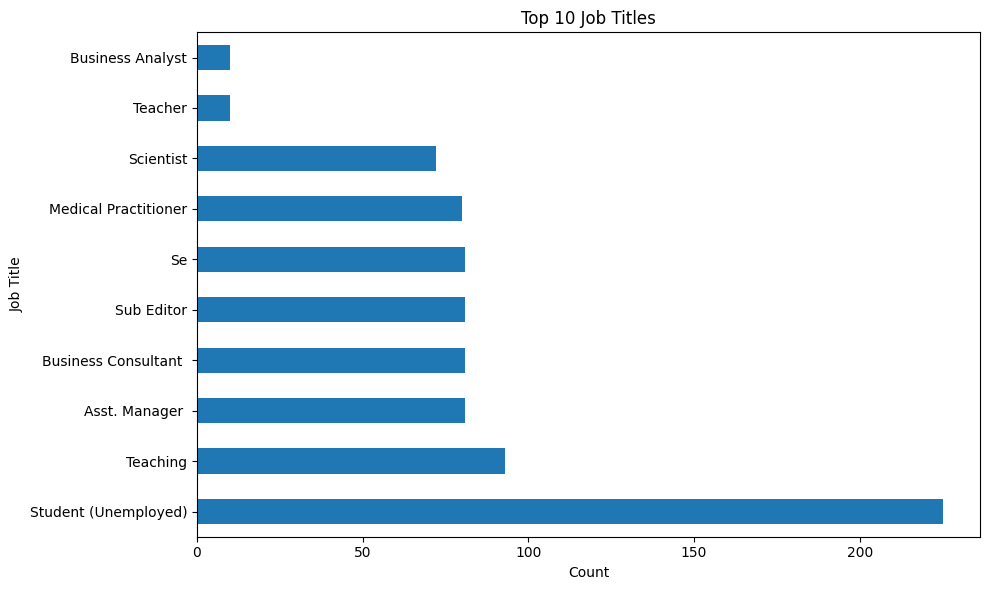

In [78]:
# histogram of column 'Job_title' of the top 10 job titles

# Get the top 10 job titles by frequency
top_10_jobs = df['Job_title'].value_counts().head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
top_10_jobs.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles')
plt.tight_layout()
plt.show()


<Axes: ylabel='Job_title'>

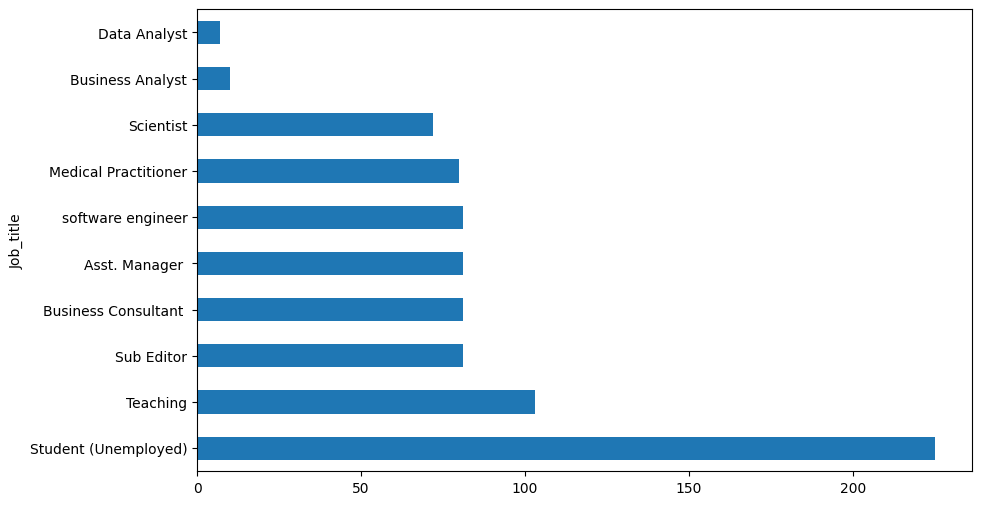

In [79]:
# replace 'se' with 'software engineer' in the 'Job_title' column and combine 'Teacher' and 'Teaching' into 'Teacher'
df['Job_title'] = df['Job_title'].str.replace('Se', 'software engineer')
df['Job_title'] = df['Job_title'].str.replace('Teacher', 'Teaching')

# histogram of column 'Job_title' of the top 10 job titles

# Get the top 10 job titles by frequency
top_10_jobs = df['Job_title'].value_counts().head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
top_10_jobs.plot(kind='barh')


In [80]:
# Import required libraries
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import pandas as pd

# Download required NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Create a tokenizer that handles commas, semicolons, and slashes
tokenizer = RegexpTokenizer(r'[^,;/]+')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a word
def lemmatize_word(word):
    # Get the part of speech
    pos = wordnet.VERB  # Default to verb
    # Lemmatize the word
    return lemmatizer.lemmatize(word.lower(), pos=pos)

# Function to process interests
def process_interests(interests):
    if pd.isna(interests):
        return []
    # Tokenize the interests
    tokens = tokenizer.tokenize(str(interests))
    # Lemmatize each token
    lemmatized = [lemmatize_word(token.strip()) for token in tokens]
    return lemmatized

# Apply the processing to the interests column
df['processed_interests'] = df['interests'].apply(process_interests)

# Display the results
print("Original interests vs Processed interests:")
for orig, proc in zip(df['interests'].head(), df['processed_interests'].head()):
    print(f"Original: {orig}")
    print(f"Processed: {proc}")
    print("---")

Original interests vs Processed interests:
Original: News Coverage;Social Justice;Content Writing;Govt. Job
Processed: ['news coverage', 'social justice', 'content writing', 'govt. job']
---
Original: Sales/Marketing, Entrepreneurship
Processed: ['sales', 'market', 'entrepreneurship']
---
Original: Take risk for Profits, Teaching, Technology
Processed: ['take risk for profits', 'teach', 'technology']
---
Original: Sales/Marketing, Entrepreneurship
Processed: ['sales', 'market', 'entrepreneurship']
---
Original: News Coverage;Social Justice;Content Writing;Govt. Job
Processed: ['news coverage', 'social justice', 'content writing', 'govt. job']
---


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abmir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abmir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abmir\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [81]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer instance
tfidf = TfidfVectorizer(
    max_features=1000,  # Limit the number of features
    stop_words='english',  # Remove common English words
    ngram_range=(1, 2)  # Consider both single words and pairs of words
)

# Convert the lists of interests back to strings for vectorization
interest_texts = [' '.join(interests) for interests in interests_lists]

# Fit and transform the data
tfidf_matrix = tfidf.fit_transform(interest_texts)

# Convert to DataFrame for easier viewing
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

# Display the shape of the TF-IDF matrix
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

# Display the first few rows of the TF-IDF features
print("\nFirst few TF-IDF features:")
print(tfidf_df.head())

# Display some of the most important terms
print("\nTop 10 most important terms:")
importance = pd.DataFrame({
    'term': tfidf.get_feature_names_out(),
    'importance': tfidf.idf_
}).sort_values('importance', ascending=False)
print(importance.head(10))

TF-IDF matrix shape: (594, 339)

First few TF-IDF features:
   admin  admin construction  agriculture  agriculture services  analysis  \
0    0.0                 0.0          0.0                   0.0       0.0   
1    0.0                 0.0          0.0                   0.0       0.0   
2    0.0                 0.0          0.0                   0.0       0.0   
3    0.0                 0.0          0.0                   0.0       0.0   
4    0.0                 0.0          0.0                   0.0       0.0   

   analysis content  analysis data  analysis entrepreneurship  analysis game  \
0               0.0            0.0                        0.0            0.0   
1               0.0            0.0                        0.0            0.0   
2               0.0            0.0                        0.0            0.0   
3               0.0            0.0                        0.0            0.0   
4               0.0            0.0                        0.0            0.0 

In [82]:
# Import required libraries
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import pandas as pd

# Download required NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Create a tokenizer that handles commas, semicolons, and slashes
tokenizer = RegexpTokenizer(r'[^,;/]+')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a word
def lemmatize_word(word):
    # Get the part of speech
    pos = wordnet.VERB  # Default to verb
    # Lemmatize the word
    return lemmatizer.lemmatize(word.lower(), pos=pos)

# Function to process interests
def process_skills(skills):
    if pd.isna(skills):
        return []
    # Tokenize the interests
    tokens = tokenizer.tokenize(str(skills))
    # Lemmatize each token
    lemmatized = [lemmatize_word(token.strip()) for token in tokens]
    return lemmatized

# Apply the processing to the interests column
df['processed_skills'] = df['skills'].apply(process_skills)

# Display the results
print("Original interests vs Processed interests:")
for orig, proc in zip(df['interests'].head(), df['processed_interests'].head()):
    print(f"Original: {orig}")
    print(f"Processed: {proc}")
    print("---")

Original interests vs Processed interests:
Original: News Coverage;Social Justice;Content Writing;Govt. Job
Processed: ['news coverage', 'social justice', 'content writing', 'govt. job']
---
Original: Sales/Marketing, Entrepreneurship
Processed: ['sales', 'market', 'entrepreneurship']
---
Original: Take risk for Profits, Teaching, Technology
Processed: ['take risk for profits', 'teach', 'technology']
---
Original: Sales/Marketing, Entrepreneurship
Processed: ['sales', 'market', 'entrepreneurship']
---
Original: News Coverage;Social Justice;Content Writing;Govt. Job
Processed: ['news coverage', 'social justice', 'content writing', 'govt. job']
---


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abmir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abmir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abmir\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [83]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer instance
tfidf = TfidfVectorizer(
    max_features=1000,  # Limit the number of features
    stop_words='english',  # Remove common English words
    ngram_range=(1, 2)  # Consider both single words and pairs of words
)

# Convert the lists of interests back to strings for vectorization
skills_texts = [' '.join(skills) for skills in skills_lists]

# Fit and transform the data
tfidf_matrix = tfidf.fit_transform(skills_texts)

# Convert to DataFrame for easier viewing
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

# Display the shape of the TF-IDF matrix
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

# Display the first few rows of the TF-IDF features
print("\nFirst few TF-IDF features:")
print(tfidf_df.head())

# Display some of the most important terms
print("\nTop 10 most important terms:")
importance = pd.DataFrame({
    'term': tfidf.get_feature_names_out(),
    'importance': tfidf.idf_
}).sort_values('importance', ascending=False)
print(importance.head(10))

TF-IDF matrix shape: (594, 943)

First few TF-IDF features:
    ac  ac converters  accounting  accounting creativity  accounting credit  \
0  0.0            0.0         0.0                    0.0                0.0   
1  0.0            0.0         0.0                    0.0                0.0   
2  0.0            0.0         0.0                    0.0                0.0   
3  0.0            0.0         0.0                    0.0                0.0   
4  0.0            0.0         0.0                    0.0                0.0   

   accounting excel  accounting market  accounting sales  accounting skills  \
0               0.0                0.0               0.0                0.0   
1               0.0                0.0               0.0                0.0   
2               0.0                0.0               0.0                0.0   
3               0.0                0.0               0.0                0.0   
4               0.0                0.0               0.0              

In [84]:
df

,A_ID,Gender,Education,Specialization,interests,skills,Yearly salary in pounds,Certifications,Job_status,Job_title,Highest Qualification,processed_interests,processed_skills
0,A1,Male,B.Sc,Physics,News Coverage;Social Justice;Content Writing;G...,Accounting Skills;Critical Thinking;Gathering ...,57,No,Yes,Sub Editor,Master of journalism,"[news coverage, social justice, content writin...","[accounting skills, critical thinking, gatheri..."
1,A2,Male,Bachelor of Management Studies,Business Administration,"Sales/Marketing, Entrepreneurship","Business Knowledge, People Management, Communi...",61,No,Yes,Business Consultant,Master in Commerce,"[sales, market, entrepreneurship]","[business knowledge, people management, commun..."
2,A3,Female,B.Sc,Computer Science Engineering,"Take risk for Profits, Teaching, Technology","Accounting Skills, Business Knowledge, Program...",77,C programming,No,Office assistant and acoounts,Masters in Computer Science,"[take risk for profits, teach, technology]","[accounting skills, business knowledge, progra..."
3,A4,Male,Bachelor of Management Studies,Business Administration,"Sales/Marketing, Entrepreneurship","Business Knowledge, People Management, Communi...",50,No,Yes,Business Consultant,Master in Commerce,"[sales, market, entrepreneurship]","[business knowledge, people management, commun..."
4,A5,Male,B.Sc,Physics,News Coverage;Social Justice;Content Writing;G...,Accounting Skills;Critical Thinking;Gathering ...,79,No,Yes,Sub Editor,Master of journalism,"[news coverage, social justice, content writin...","[accounting skills, critical thinking, gatheri..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A996,Male,B.Sc,Physics,News Coverage;Social Justice;Content Writing;G...,Accounting Skills;Critical Thinking;Gathering ...,46,No,Yes,Sub Editor,Master of journalism,"[news coverage, social justice, content writin...","[accounting skills, critical thinking, gatheri..."
996,A997,Male,BE,Chemistry,"Research, Teaching, Technology","Gathering Informing, Leadership, Market Study,...",60,No,Yes,Design Engineer,Masters in Automotive Technologies,"[research, teach, technology]","[gathering informing, leadership, market study..."
997,A998,Male,B.Sc,Information Technology,Technology,Active Listening;Critical Thinking,65,No,Yes,software engineer,Ma,[technology],"[active listening, critical thinking]"
998,A999,Female,B.Tech,Automobile Engineering,"Financial Analysis, Teaching, Technology","Accounting Skills, Communication Skills, Editi...",56,No,No,Student (Unemployed),Masters in Mathematics,"[financial analysis, teach, technology]","[accounting skills, communication skills, edit..."


In [85]:
#ouput df to csv
df.to_csv('processed_data.csv', index=False)
